In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

    Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе):
    
    Для данной задачи было выбрано распределение Максвелла (http://mathworld.wolfram.com/MaxwellDistribution.html) с параметром a = 0.67.

In [92]:
summa = 0
for i in range(5, 12):
    summa += 3**i * np.math.exp(-3) / np.math.factorial(i)
print(summa)

0.18466536884725376


In [72]:
a = 0.67
maxwell_rv = sts.maxwell(scale=a)

    Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

/home/hellorome/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


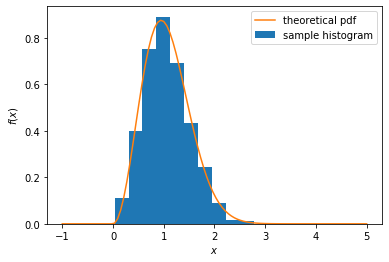

In [73]:
#  код генерации выборки и отрисовки её гистограммы
sample = maxwell_rv.rvs(1000);
plt.hist(sample, normed=True, label='sample histogram');
#  задаем масштаб оси х и получаем массив значений теоретической плотности распределения во всем масштабе значений
x = np.linspace(-1, 5, 100)
pdf = maxwell_rv.pdf(x)
#  отрисовываем тпо на гистограмме, полученной выше, подписываем графики
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()


    Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

/home/hellorome/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


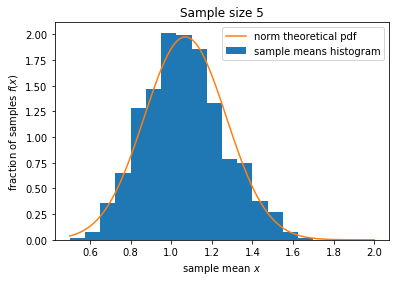

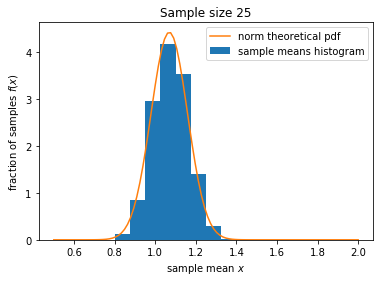

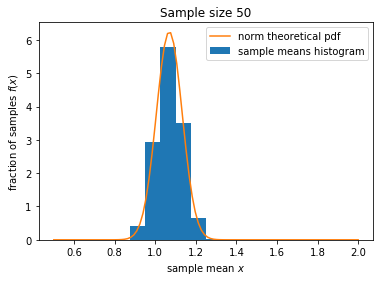

In [86]:
for n in [5, 25, 50]:
    #  код генерации выборки и отрисовки её гистограммы
    sample_means = np.array([maxwell_rv.rvs(n).mean() for _ in range(1000)])
    plt.hist(sample_means, 20, normed=True, range=[0.5, 2], label='sample means histogram')
    #  вычисляем pdf нормального распределения с параметрами, вычисленными из параметров распределения Максвелла
    maxwell_mean = 2 * a * np.sqrt(2/np.pi)
    maxwell_std = a**2 * (3*np.pi - 8) / np.pi
    norm_rv = sts.norm(maxwell_mean, np.sqrt(maxwell_std / n))
    x = np.linspace(0.5, 2, 100)
    pdf = norm_rv.pdf(x)
    #  отрисовываем на графике
    plt.plot(x, pdf, label='norm theoretical pdf')
    #  добавляем легенду на график
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

    Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

С увеличением объема выборки n все выборочные средние в полученных распределениях начинают концентрироваться вокруг среднего генеральной совокупности, при этом СКО уменьшается, что говорит о том, что точность аппроксимации с ростом n улучшается.

Из также графиков видно, что полученные гистограммы сходятся с графиками теоретической плотности нормального распредения, построенными по параметрам среднего и СКО исходного распределения.